In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 머신러닝/딥러닝 : 데이터의 법칙성을 추출
- 다양한 분야에서 응용 : 글씨인식, 문장분류, 질병진단
- ※ ML/DL 의 종류
    - 지도학습(독립 = 입력변수와 종속=타겟=출력변수가 모두 주어졌을 경우)
        - 회귀분석(종속변수가 연속형) vs 분류분석(multi, binary)
    - 비지도학습(입력변수만)
        - 군집화
    - 강화학습(요즘에는 잘 사용하지 않는다)

- ※ 지도학습에서의 ML, DL 프로그래밍 방식
1. 데이터 셋 확보(input=입력변수, target=종속변수)
    
    원본 데이터 및 시뮬레이션을 통해 데이터 생성
2. 전처리
    
    스케일 조정

    훈련셋(학습셋), 검증셋, 시험셋(테스트셋)

    학습 및 평가 가능한 포맷으로 변환(numpy, DataFrame)
3. 모델 구성
    
    Sequential 객체 생성뒤 필요한 층을 add()함수로 추가
4. 모델 학습과정 설정

    compile()함수 이용. 손실함수, optimizer, metrics(평가지표)

5. 모델 학습시키기 (ft. 학습과정 지켜보기)

    fit()함수 이용 - 훈련셋입력=독립변수, 훈련셋타겟=종속변수, 학습횟수, 검증셋

6. 모델 평가

    시험셋(테스트셋)을 인자로 넣은 evaluate()함수 이용, 그래프

7. 모델 사용
    
    predict() 이용. 입력데이터는 2차원 [[0]]

8. 모델 저장
    save()함수 이용해서 저장. 저장된 모델은 load_model()함수를 이용해서 불러올 수 있음

# 1. 데이터 셋 생성
# 2. 데이터 전처리

In [6]:
# 학습데이터 = 훈련데이터
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2,4,6,8,10,12,14,16,18])
# 테스트셋 = 시험데이터
x_test = np.array([1,2,3,4,5,6,7,8,9])
y_test = np.array([2,4,6,8,10,12,14,16,18])

In [11]:
# 인코딩 종류
data = np.array(['a','b','c','d'])
print('원 데이터 : ',data)
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
# le.fit(data)
# labeled_data = le.transform(data)
labeled_data = le.fit_transform(data)
print('라벨인코딩된 데이터 : ', labeled_data)
one_hot_encoded_data = to_categorical(labeled_data)
print('원핫인코딩된 데이터 : ', one_hot_encoded_data)

원 데이터 :  ['a' 'b' 'c' 'd']
라벨인코딩된 데이터 :  [0 1 2 3]
원핫인코딩된 데이터 :  [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [19]:
# 분류 분석을 하기 위해 target을 원핫인코딩(라벨링 전환)
data = np.array([1,2,2,4,2])
print(data)
categorical_noe_hot = to_categorical(data)
print('to_categorical을 이용한 원핫인코딩 :\n ', categorical_noe_hot)
import pandas as pd
get_dumies_one_hot = pd.get_dummies(data)
display('get_dumies를 이용한 원핫인코딩 :',get_dumies_one_hot)

[1 2 2 4 2]
to_categorical을 이용한 원핫인코딩 :
  [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


'get_dumies를 이용한 원핫인코딩 :'

,1,2,4
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [26]:
# 분류분석을 위한 종속변수 라벨링 전환(=원핫인코딩)
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

In [ ]:
print('훈련셋 구조:',x_train.shape, Y_train.shape) # 독립변수 1개
print('검증셋 구조:',x_val.shape, Y_val.shape)
print('테스트셋 구조:',x_test.shape, Y_test.shape)

훈련셋 구조: (90,) (90, 19)
검증셋 구조: (9,) (9, 19)
테스트셋 구조: (9,) (9, 19)


# 3. 모델 구성하기

In [43]:
model = Sequential()
model.add(Input(shape=(1,))) # 입력층
model.add(Dense(units=38, activation='sigmoid')) # units 출력수, 활성화함수: relu, tanh 등
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=19, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 38)                76        
                                                                 
 dense_5 (Dense)             (None, 64)                2496      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습과정 설정

In [44]:
model.compile(loss='categorical_crossentropy', # 분류분석에서의 손실함수(원핫인코딩有)
              optimizer='sgd',
              metrics=['accuracy']) # 평가지표 : accuracy


# 5. 모델 학습시키기

In [45]:
hist = model.fit(x_train, Y_train, 
          epochs=300, 
          batch_size=10, 
          verbose=2,
          validation_data=(x_val, Y_val)) # 학습결과 출력 옵셥 0:출력x, 1:기본값, 2:에포크별 로그메세지

Epoch 1/300
9/9 - 1s - loss: 2.9437 - accuracy: 0.0778 - val_loss: 2.8900 - val_accuracy: 0.1111 - 535ms/epoch - 59ms/step
Epoch 2/300
9/9 - 0s - loss: 2.8604 - accuracy: 0.0889 - val_loss: 2.8171 - val_accuracy: 0.1111 - 44ms/epoch - 5ms/step
Epoch 3/300
9/9 - 0s - loss: 2.7944 - accuracy: 0.1000 - val_loss: 2.7601 - val_accuracy: 0.1111 - 41ms/epoch - 5ms/step
Epoch 4/300
9/9 - 0s - loss: 2.7430 - accuracy: 0.1111 - val_loss: 2.7155 - val_accuracy: 0.1111 - 42ms/epoch - 5ms/step
Epoch 5/300
9/9 - 0s - loss: 2.7033 - accuracy: 0.1111 - val_loss: 2.6774 - val_accuracy: 0.1111 - 42ms/epoch - 5ms/step
Epoch 6/300
9/9 - 0s - loss: 2.6658 - accuracy: 0.1111 - val_loss: 2.6406 - val_accuracy: 0.1111 - 42ms/epoch - 5ms/step
Epoch 7/300
9/9 - 0s - loss: 2.6303 - accuracy: 0.1222 - val_loss: 2.6053 - val_accuracy: 0.1111 - 83ms/epoch - 9ms/step
Epoch 8/300
9/9 - 0s - loss: 2.5956 - accuracy: 0.1222 - val_loss: 2.5711 - val_accuracy: 0.1111 - 59ms/epoch - 7ms/step
Epoch 9/300
9/9 - 0s - loss: 2

# 6. 모델 평가하기(모델학습과정 살펴보고, evalute)

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

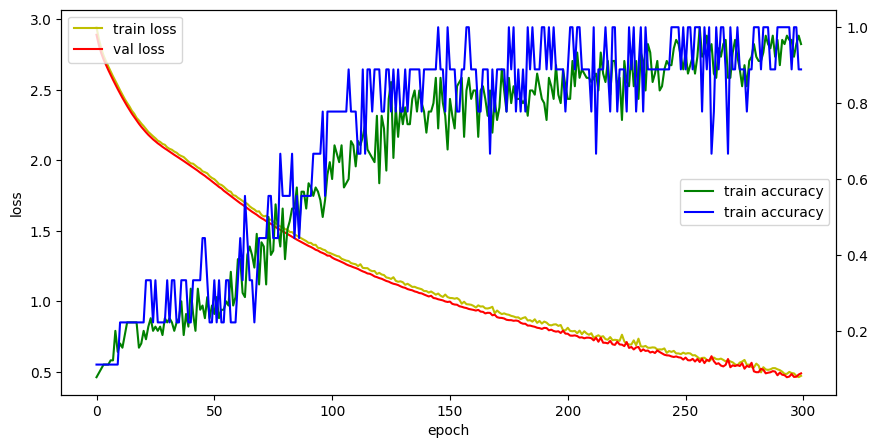

In [60]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='train accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')

In [ ]:
# 모델 평가
score = model.evaluate(x_test, Y_test, batch_size=3)
score

3/3 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.8889


[0.4896087050437927, 0.8888888955116272]

In [70]:
print('평가된 loss :',score[0])
print('평가된 accuracy :',score[1])

평가된 loss : 0.4896087050437927
평가된 accuracy : 0.8888888955116272


# 7. 모델 사용하기

In [78]:
H = model.predict(np.array([[2]]))
H

1/1 [==============================] - 0s 25ms/step


array([[1.8792914e-12, 2.5125832e-12, 7.3859729e-02, 7.4260993e-11,
        7.6572657e-01, 3.6334211e-10, 1.5932705e-01, 1.4680496e-09,
        1.0848998e-03, 4.2146083e-14, 1.7463549e-06, 2.4095495e-15,
        4.0416009e-10, 1.2442204e-15, 8.5612873e-15, 1.1931400e-13,
        2.5936562e-20, 5.7958555e-10, 1.0454759e-28]], dtype=float32)

In [77]:
model.predict(np.array([[3]])).argmax()

1/1 [==============================] - 0s 26ms/step


6

In [87]:
H.argmax(), H[0, H.argmax()]*100 

(4, 76.57265663146973)

# 8. 모델 저장하기

In [89]:
from tensorflow.keras.models import save_model
save_model(model, 'model/02_deep.h5')

저장된 모델 사용하기

In [1]:
from tensorflow.keras.models import load_model
model2 = load_model('model/02_deep.h5')

In [2]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 38)                76        
                                                                 
 dense_5 (Dense)             (None, 64)                2496      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


In [14]:
import numpy as np
data = np.array([[2],[3]])
predictions = model2.predict(data)
predictions.argmax(axis=-1)

1/1 [==============================] - 0s 22ms/step


array([4, 6], dtype=int64)

In [15]:
def predict_classes(model, data):
    predictions = model.predict(data)
    return predictions.argmax(axis=-1)

In [24]:
input_data = int(input('데이터 입력 :'))
data = np.array([[input_data]])
print('예측된 분류는 ',predict_classes(model2, data))

1/1 [==============================] - 0s 24ms/step
예측된 분류는  [18]


In [ ]:
import tensorflow as tf
@tf.function(reduce_retracing=True)
def predict_classes(model,data):
    predictions = model(data,training=False)
    return tf.argmax(predictions, axis=-1)


In [27]:
input_data = int(input('데이터 입력 :'))
data = np.array([[input_data]])
print('예측된 분류는 ',predict_classes(model2, data))

예측된 분류는  tf.Tensor([2], shape=(1,), dtype=int64)
